In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')
df.head()
newcolnames = {'School DBN':'dbn','School Name':'sname','School Level':'level','Regents Exam':'regexam',
              'Total Tested':'tested' , 'Mean Score':'mean' , 'Number Scoring Below 65':'nb65' , 
               'Percent Scoring Below 65':'pb65',  'Number Scoring 65 or Above':'na65' , 'Percent Scoring 65 or Above':'pa65' , 
               'Number Scoring 80 or Above':'na80' , 'Percent Scoring 80 or Above':'pa80',
                'Number Scoring CR':'ncr' , 'Percent Scoring CR':'pcr' }
df.rename(columns=newcolnames, inplace=True)
df.head()


,dbn,sname,level,regexam,Year,tested,mean,nb65,pb65,na65,pa65,na80,pa80,ncr,pcr
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [11]:
df.describe(include='all')

,dbn,sname,level,regexam,Year,tested,mean,nb65,pb65,na65,pa65,na80,pa80,ncr,pcr
count,212331,212331,212331,212321,212331.000000,212331.000000,212331,212331,212331,212331,212331,212331,212331,212331,212331
unique,1018,1012,6,14,NaN,NaN,748,446,992,945,992,744,1000,707,999
top,22K425,New Visions Charter High School for Advanced Math,High school,Common Core Algebra,NaN,NaN,s,s,s,s,s,s,s,na,na
freq,490,1337,151160,29254,NaN,NaN,75222,75222,75222,75222,75222,75222,75222,142680,142680
mean,NaN,NaN,NaN,NaN,2015.956069,49.364200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.799726,93.023576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2015.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2015.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2016.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2017.000000,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df['district']=df['dbn'].str.slice(stop=2)
df['borough']=df['dbn'].str.slice(start=2,stop=3)
df['snumber']=df['dbn'].str.slice(start=3,stop=6)
df.head()

,dbn,sname,level,regexam,Year,tested,mean,nb65,pb65,na65,pa65,na80,pa80,ncr,pcr,district,borough,snumber
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na,01,M,034
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na,01,M,034
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na,01,M,034
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na,01,M,140
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na,01,M,140


In [13]:
df.isnull().sum()


dbn          0
sname        0
level        0
regexam     10
Year         0
tested       0
mean         0
nb65         0
pb65         0
na65         0
pa65         0
na80         0
pa80         0
ncr          0
pcr          0
district     0
borough      0
snumber      0
dtype: int64

In [14]:
df['mean']=pd.to_numeric(df['mean'], errors='coerce')
df['nb65']=pd.to_numeric(df['nb65'], errors='coerce')
df['pb65']=pd.to_numeric(df['pb65'], errors='coerce')
df['na65']=pd.to_numeric(df['na65'], errors='coerce')
df['pa65']=pd.to_numeric(df['pa65'], errors='coerce')
df['na80']=pd.to_numeric(df['na80'], errors='coerce')
df['pa80']=pd.to_numeric(df['pa80'], errors='coerce')
df['ncr']=pd.to_numeric(df['ncr'], errors='coerce')
df['pcr']=pd.to_numeric(df['pcr'], errors='coerce')
df.dtypes
df = df.dropna()
df['nb65'] = df['nb65'].astype(int)
df['pb65'] = df['pb65'].astype(int)
df['na65'] = df['na65'].astype(int)
df['pa65'] = df['pa65'].astype(int)
df['na80'] = df['na80'].astype(int)
df['pa80'] = df['pa80'].astype(int)
df['ncr'] = df['ncr'].astype(int)
df['pcr'] = df['pcr'].astype(int)


df.head(1000)
df.dtypes

dbn          object
sname        object
level        object
regexam      object
Year          int64
tested        int64
mean        float64
nb65          int32
pb65          int32
na65          int32
pa65          int32
na80          int32
pa80          int32
ncr           int32
pcr           int32
district     object
borough      object
snumber      object
dtype: object

In [15]:
df['level'].unique()
df['regexam'].unique()
df['Year'].unique()

array([2015, 2016, 2017], dtype=int64)

In [16]:
df2 = df[['borough','mean']]
df2.head

<bound method NDFrame.head of        borough  mean
8            M  78.4
9            M  79.0
10           M  84.8
12           M  62.9
13           M  69.0
...        ...   ...
212311       X  82.6
212320       X  87.9
212321       X  87.2
212322       X  87.0
212323       X  88.3

[69643 rows x 2 columns]>

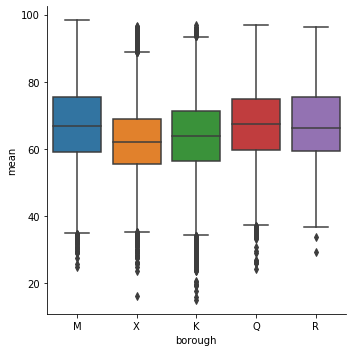

In [17]:
sns.catplot(x="borough", y="mean", kind="box",  data=df)

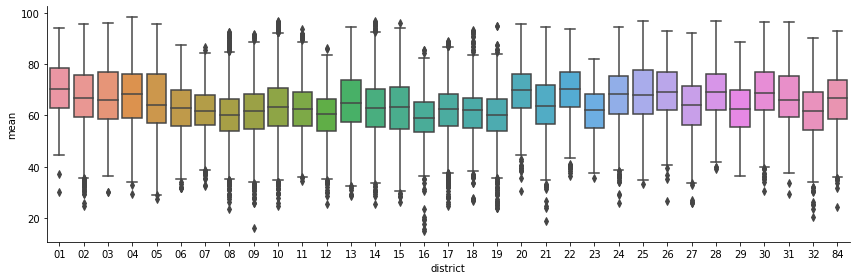

In [18]:
sns.catplot(x="district", y="mean", kind="box", data=df ,height=4, aspect=3)

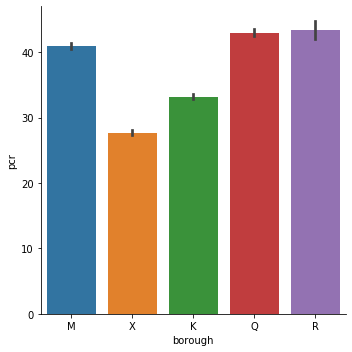

In [19]:
sns.catplot(x="borough", y="pcr", kind="bar",  data=df)

<Figure size 43200x43200 with 0 Axes>

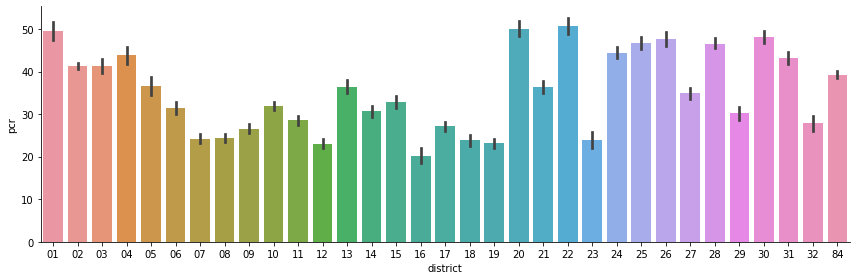

In [51]:
plt.figure(figsize=(600, 600))
sns.catplot(x="district", y="pcr", kind="bar",  data=df,height=4, aspect=3)


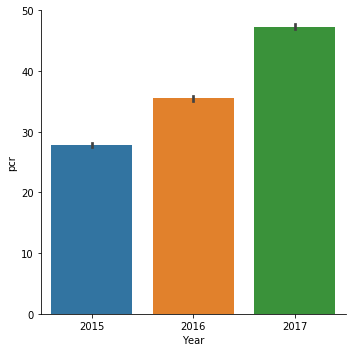

In [40]:
sns.catplot(x="Year", y="pcr", kind="bar",  data=df)

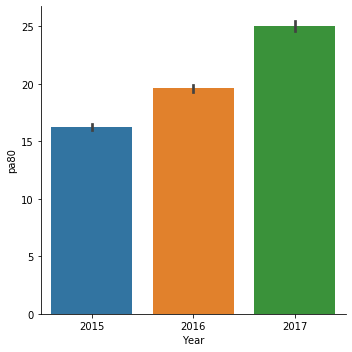

In [20]:
sns.catplot(x="Year", y="pa80", kind="bar",  data=df)